# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Соколов Игорь Александрович, группа 573

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,189,90,36,78,179,64,8,157,42,19,126,182,367,142,66,1,20,192,198
1,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184
2,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184
3,129,100,48,95,209,68,7,199,32,23,150,216,605,200,73,7,11,192,194
4,378,82,36,54,117,53,7,125,54,18,126,146,229,128,78,1,5,180,184
5,422,90,34,66,158,59,7,140,47,18,124,165,298,117,61,1,3,201,207
6,227,94,35,66,147,62,9,131,50,18,127,159,258,115,66,8,7,196,201
7,440,101,51,98,194,60,10,195,34,22,161,219,572,219,67,0,10,192,201
8,336,89,44,76,125,54,10,156,44,20,151,163,352,176,76,12,12,184,193
9,146,100,46,85,164,64,11,163,42,20,163,176,387,170,71,18,0,189,196


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,411.225865,93.659381,44.721311,82.242259,169.435337,61.856102,8.683060,168.663024,40.910747,20.561020,147.790528,188.661202,438.446266,173.553734,72.169399,6.400729,12.681239,189.196721,195.992714
std,244.207066,8.352772,6.116324,15.336540,32.878868,8.363506,4.826715,32.671967,7.609616,2.539903,14.403398,30.959621,173.863178,31.732046,7.798704,5.015276,8.991198,6.206124,7.377215
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,195.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,410.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,584.000000,195.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,261.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
### YOUR CODE HERE 
# (next some cells are mine)

Подключим дополнительные библиотеки

In [7]:
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

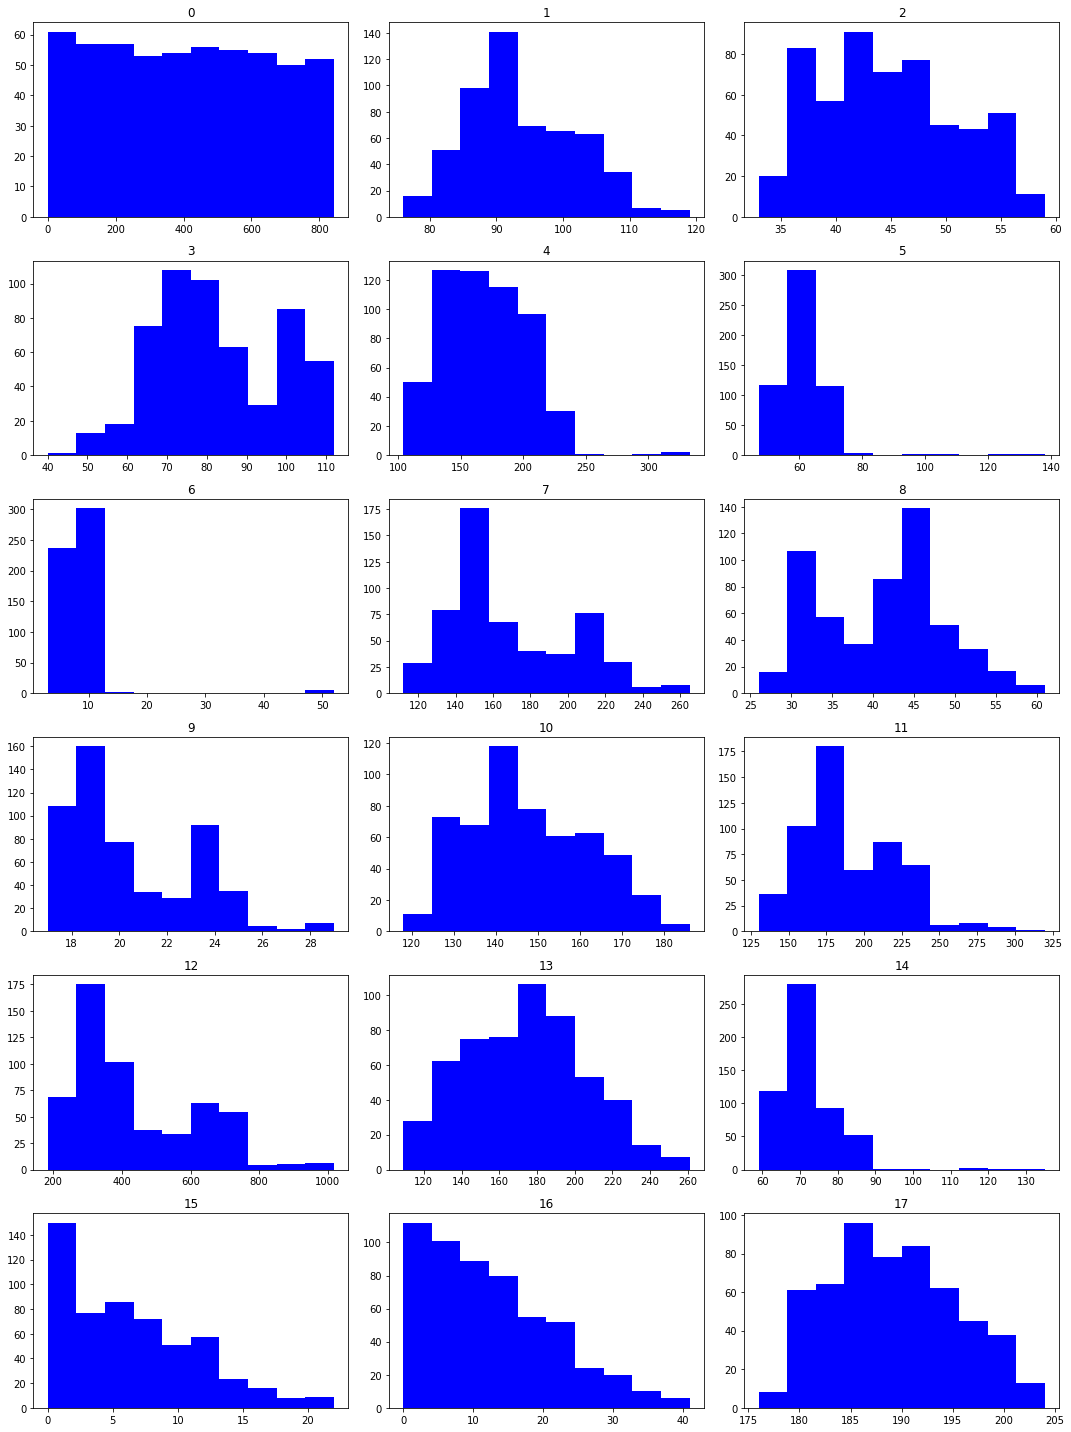

In [8]:
#Построим гистограммы для вещественных признаков до стандартизации

def plot_hist(data_matrix, n_rows=6, n_cols=3):
    n_bins = 10
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
    ax = axes.flatten()

    for i in range(data_matrix.shape[1] - 1):
        ax[i].hist(data_matrix[:,i], n_bins, color="blue")
        #ax[i].legend(prop={'size': 10})
        ax[i].set_title(str(i))

    fig.tight_layout()
    plt.show()

plot_hist(X_train)

и 18 столбец из матрицы объект признак

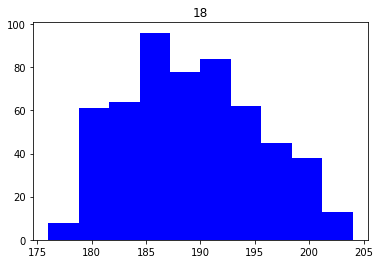

In [9]:
plt.hist(X_train[:,17], bins=10, color="blue")
plt.title(str(18))
plt.show()

Итог: значения признаков имеют разный масштаб - при обучении модели необходимл провести стандартизацию 

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [10]:
### YOUR CODE HERE

from sklearn.pipeline import make_pipeline
import itertools
import tqdm

N = 5
result = np.zeros((N, 2))

kfold = sklearn.model_selection.KFold(5, shuffle=True)

for C_pair, penalty_pair in tqdm.tqdm(itertools.product(enumerate(np.linspace(0.01, 1, N)), enumerate(['l1', 'l2'])), total=N*2):
     result[C_pair[0]][penalty_pair[0]] = sklearn.model_selection.cross_val_score(
         make_pipeline(
             StandardScaler(),
             LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty_pair[1], C=C_pair[1])),
         X_train,
         y_train,
         scoring='accuracy',
         cv=kfold,
         n_jobs=-1
     ).mean()

100%|██████████| 10/10 [00:04<00:00,  4.46it/s]


In [11]:
result

array([[0.22770642, 0.60647206],
       [0.73951626, 0.72316931],
       [0.75226022, 0.75406172],
       [0.75597998, 0.7522769 ],
       [0.77421184, 0.75404504]])

Каждый столбец выше соответствует регуляризатору - l1 или l2.

Строка - параметру регуляризации.

In [12]:
np.linspace(0.01, 1, N)[N-1]

1.0

Наибильший accuracy получили при l1 и C = 1.0

Обучим на нем классификатор.

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [14]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
unique_target = np.unique(target)
target =  label_binarize(target, unique_target)

/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


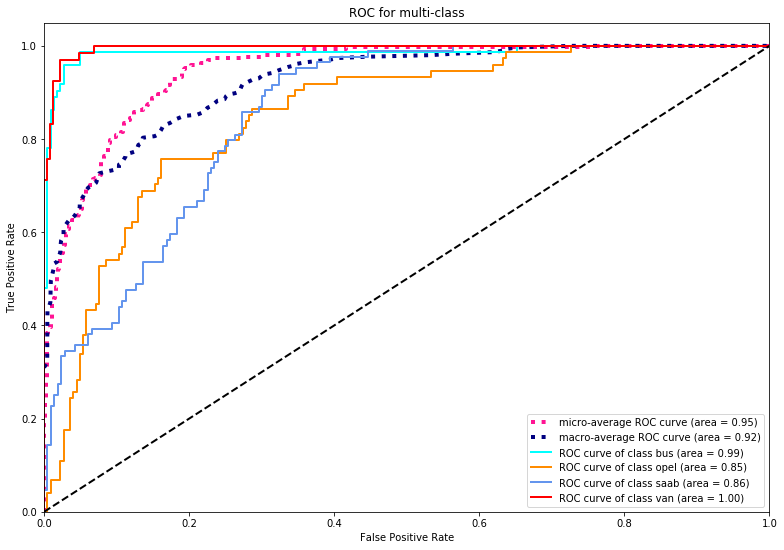

In [15]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

X_train, X_test, y_train_bin, y_test_bin = train_test_split(data, target, test_size=0.35,random_state=0)

classifier = OneVsRestClassifier(LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=1000000))

scaler = StandardScaler()
scaler.fit(X_train, y_train_bin)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

y_score = classifier.fit(X_train_scaled, y_train_bin).decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
lw = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(13, 9))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(unique_target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.metrics import f1_score, accuracy_score
y_score = classifier.fit(X_train_scaled, y_train_bin).predict(X_test_scaled)
for i in range(n_classes):
    print('Accuracy of the class {0}: {1}'
             ''.format(unique_target[i], accuracy_score(y_test_bin[:, i], y_score[:, i])))
    print('f1_score of the class {0}: {1}'
             ''.format(unique_target[i], f1_score(y_test_bin[:, i], y_score[:, i])))

Accuracy of the class bus: 0.9595959595959596
f1_score of the class bus: 0.9130434782608695
Accuracy of the class opel: 0.8215488215488216
f1_score of the class opel: 0.5954198473282442
Accuracy of the class saab: 0.7643097643097643
f1_score of the class saab: 0.5205479452054794
Accuracy of the class van: 0.9696969696969697
f1_score of the class van: 0.9323308270676692


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

[]

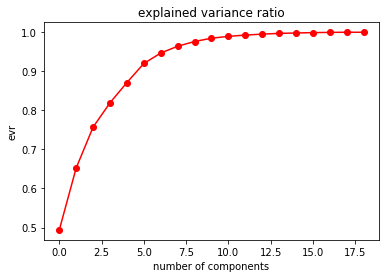

In [17]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train_scaled.shape[1])
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
expl_var_cum = pca.explained_variance_ratio_.cumsum()

plt.plot(np.arange(X_train_scaled.shape[1]), expl_var_cum, 'o-', color='red')

plt.ylabel('evr')
plt.xlabel('number of components')
plt.title("explained variance ratio")

plt.plot()

    

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [26]:
expl_var_cum[6]

0.9467760032504843

Возмем $m = 7$, так как при $m \geq 7$ объясненная дисперсия слабо меняется при увеличении числа главных компонент

In [19]:
### YOUR CODE HERE

m = 7
pca = PCA(n_components = m
         )
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

Сделаем все аналогично пункту 2.1

In [20]:
### YOUR CODE HERE

from sklearn.pipeline import make_pipeline
import itertools
import tqdm

N = 5
result = np.zeros((N, 2))

kfold = sklearn.model_selection.KFold(5, shuffle=True)

for C_pair, penalty_pair in tqdm.tqdm(itertools.product(enumerate(np.linspace(0.01, 1, N)), enumerate(['l1', 'l2'])), total=N*2):
     result[C_pair[0]][penalty_pair[0]] = sklearn.model_selection.cross_val_score(
         LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty_pair[1], C=C_pair[1]),
         X_train_pca,
         y_train,
         scoring='accuracy',
         cv=kfold,
         n_jobs=-1
     ).mean()

100%|██████████| 10/10 [00:00<00:00, 32.72it/s]


In [21]:
result

array([[0.21673061, 0.25674729],
       [0.24405338, 0.28767306],
       [0.26046706, 0.2605171 ],
       [0.24595496, 0.25884904],
       [0.26593828, 0.27324437]])

Каждый столбец выше соответствует регуляризатору - l1 или l2.

Строка - параметру регуляризации.

In [22]:
print ("Наибольший accuracy получили при l1 и C = ", np.linspace(0.01, 1, N)[N-1])

Наибольший accuracy получили при l1 и C =  1.0


Обучим на нем классификатор.

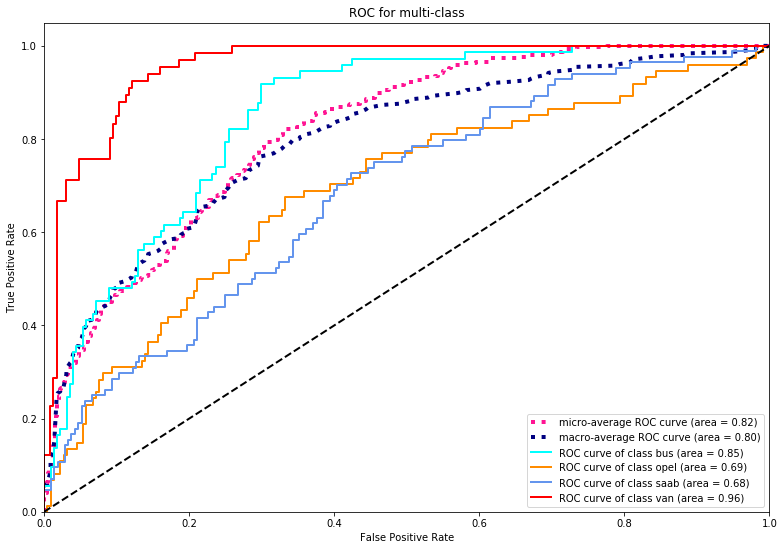

In [23]:
classifier = OneVsRestClassifier(LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=1000000))

y_score = classifier.fit(X_train_pca, y_train_bin).decision_function(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
lw = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(13, 9))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(unique_target[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class')
plt.legend(loc="lower right")
plt.show()

In [24]:
y_score = classifier.fit(X_train_pca, y_train_bin).predict(X_test_pca)
for i in range(n_classes):
    print('Accuracy of the class {0}: {1}'
             ''.format(unique_target[i], accuracy_score(y_test_bin[:, i], y_score[:, i])))
    print('f1_score of the class {0}: {1}'
             ''.format(unique_target[i], f1_score(y_test_bin[:, i], y_score[:, i])))

Accuracy of the class bus: 0.7845117845117845
f1_score of the class bus: 0.5428571428571428
Accuracy of the class opel: 0.7508417508417509
f1_score of the class opel: 0.21276595744680854
Accuracy of the class saab: 0.7373737373737373
f1_score of the class saab: 0.2777777777777778
Accuracy of the class van: 0.9057239057239057
f1_score of the class van: 0.7704918032786886


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

### На исходных(до PCA) данных 

In [27]:
from sklearn import preprocessing
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
scaler = StandardScaler()


le = preprocessing.LabelEncoder()

y_train_enc = le.fit(y_train).transform(y_train)
y_test_enc = le.transform(y_test)

scaler.fit(X_train, y_train_enc)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {'max_depth': list(np.arange(1,25))}
clf = GridSearchCV(clf, params, cv=5, scoring = 'accuracy')
clf.fit(X_train_scaled, y_train_enc)

# YOUR CODE HERE

print (clf.best_estimator_)
print (clf.best_params_)
print (clf.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 4}
0.7012750455373407


/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
print ("Наилучшему классификатору соответствует глубина ", clf.best_params_["max_depth"])


Наилучшему классификатору соответствует глубина  4


Обучим на найденном классификаторе алгоритм

In [35]:
clf = DecisionTreeClassifier(max_depth=4)

y_score = clf.fit(X_train_scaled, y_train_enc).predict(X_test_scaled)
n_classes = 4
for i in range(n_classes):
    print('Accuracy of the class {0}: {1}'
             ''.format(le.classes_[i], accuracy_score(np.int64(y_test_enc==i), np.int64(y_score==i))))
    print('f1_score of the class {0}: {1}'
             ''.format(le.classes_[i], f1_score(np.int64(y_test_enc==i), np.int64(y_score==i))))

Accuracy of the class bus: 0.9090909090909091
f1_score of the class bus: 0.8187919463087249
Accuracy of the class opel: 0.7643097643097643
f1_score of the class opel: 0.4852941176470588
Accuracy of the class saab: 0.7171717171717171
f1_score of the class saab: 0.373134328358209
Accuracy of the class van: 0.8821548821548821
f1_score of the class van: 0.8


### На преобразованных(после PCA) данных 

In [36]:
from sklearn.tree import DecisionTreeClassifier

m = 7
pca = PCA(n_components = m)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = DecisionTreeClassifier()
params = {'max_depth': list(np.arange(1,25))}
clf = GridSearchCV(clf, params, cv=5, scoring = 'accuracy')

clf.fit(X_train_pca, y_train_enc)
print (clf.best_estimator_)
print (clf.best_params_)
print (clf.best_score_)

# YOUR CODE HERE

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'max_depth': 8}
0.6284153005464481


/Users/igorsokolov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
print ("Наилучшему классификатору соответствует глубина ", clf.best_params_["max_depth"])

Наилучшему классификатору соответствует глубина  8


Обучим на найденном классификаторе алгоритм

In [40]:
clf = DecisionTreeClassifier(max_depth=8)

y_score = clf.fit(X_train_pca, y_train_enc).predict(X_test_pca)
n_classes = 4
for i in range(n_classes):
    print('Accuracy of the class {0}: {1}'
             ''.format(le.classes_[i], accuracy_score(np.int64(y_test_enc==i), np.int64(y_score==i))))
    print('f1_score of the class {0}: {1}'
             ''.format(le.classes_[i], f1_score(np.int64(y_test_enc==i), np.int64(y_score==i))))

Accuracy of the class bus: 0.9191919191919192
f1_score of the class bus: 0.8125
Accuracy of the class opel: 0.7272727272727273
f1_score of the class opel: 0.4774193548387097
Accuracy of the class saab: 0.7306397306397306
f1_score of the class saab: 0.47368421052631576
Accuracy of the class van: 0.8888888888888888
f1_score of the class van: 0.7924528301886792


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

## Будем работать на исходных(до PCA) данных 

In [41]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm

N = 50
n_classes = 4

y_score_tree_test = np.zeros((N, X_test_scaled.shape[0]))
y_score_log_test = np.zeros((N, X_test_scaled.shape[0]))

y_score_tree_train = np.zeros((N, X_train_scaled.shape[0]))
y_score_log_train = np.zeros((N, X_train_scaled.shape[0]))

for k, i in tqdm(enumerate (np.arange(2, N + 1)), total=N):
    clf_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=16), n_estimators=i, n_jobs =-1)
    clf_log = BaggingClassifier(OneVsRestClassifier(LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=1000000))
                               , n_estimators=i, n_jobs =-1)
    
    clf_tree.fit(X_train_scaled, y_train_enc)
    clf_log.fit(X_train_scaled, y_train_enc)
    
    y_score_tree_test[k] = clf_tree.predict(X_test_scaled)
    y_score_log_test[k] = clf_log.predict(X_test_scaled)
    
    y_score_tree_train[k] = clf_tree.predict(X_train_scaled)
    y_score_log_train[k] = clf_log.predict(X_train_scaled)
    
#plt.plot(list(range(2,51)), scores_train, color='blue')
#plt.plot(list(range(2,51)), scores_test, color='red')




  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:01<01:18,  1.59s/it]

  4%|▍         | 2/50 [00:03<01:20,  1.67s/it]

  6%|▌         | 3/50 [00:05<01:18,  1.67s/it]

  8%|▊         | 4/50 [00:07<01:21,  1.77s/it]

 10%|█         | 5/50 [00:10<01:35,  2.12s/it]

 12%|█▏        | 6/50 [00:11<01:29,  2.04s/it]

 14%|█▍        | 7/50 [00:14<01:34,  2.19s/it]

 16%|█▌        | 8/50 [00:17<01:42,  2.43s/it]

 18%|█▊        | 9/50 [00:19<01:37,  2.39s/it]

 20%|██        | 10/50 [00:22<01:41,  2.55s/it]

 22%|██▏       | 11/50 [00:25<01:42,  2.62s/it]

 24%|██▍       | 12/50 [00:28<01:45,  2.78s/it]

 26%|██▌       | 13/50 [00:32<01:51,  3.03s/it]

 28%|██▊       | 14/50 [00:35<01:48,  3.01s/it]

 30%|███       | 15/50 [00:39<01:57,  3.35s/it]

 32%|███▏      | 16/50 [00:43<02:01,  3.56s/it]

 34%|███▍      | 17/50 [00:47<02:05,  3.79s/it]

 36%|███▌      | 18/50 [00:52<02:08,  4.01s/it]

 38%|███▊      | 19/50 [00:57<02:12,  4.29s/it]

 40%|████      | 20/50 [01:02<02:17,

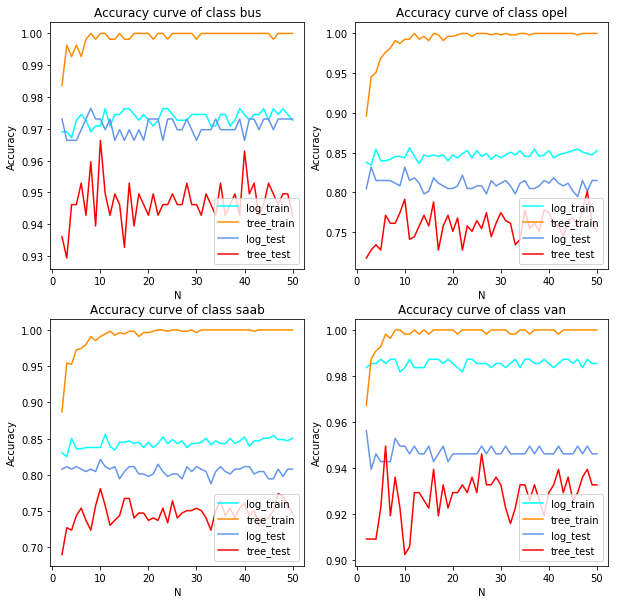

In [42]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
n_classes = 4

#вот тут делаю такую срезку потому что выделил 50 строк в матрице, а на деле заполняется только 49.
#Если бы я эту срезку не делал, была бы дальше ошибка при подсчете acuracy

data_ar   = [y_score_log_train[:-1], y_score_tree_train[:-1], y_score_log_test[:-1], y_score_tree_test[:-1]]
target_ar = [y_train_enc, y_train_enc, y_test_enc, y_test_enc]

label_ar = ["log_train", "tree_train", "log_test", "tree_test"]

n_col = 2
n_row = 2
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 50
N_ar = np.arange(2, N + 1)

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        accuracy_ar = np.array([accuracy_score(np.int64(data[l]== 2*i+j), np.int64(target==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, accuracy_ar,
                         color=color, label=str(label_ar[k]), )
                         
    axarr[i, j].set_title('Accuracy curve of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='N', ylabel='Accuracy')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axarr.flat:
 #   ax.label_outer()
plt.show()

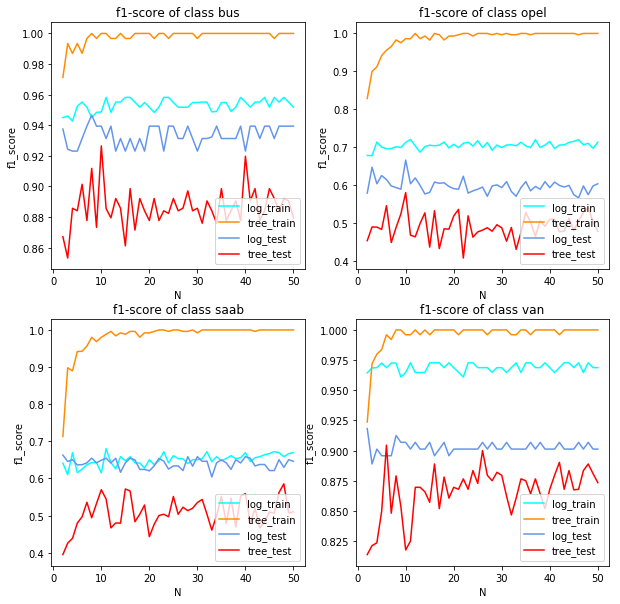

In [43]:
n_col = 2
n_row = 2

f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 50
N_ar = np.arange(2, N + 1)

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        f1_score_ar = np.array([f1_score(np.int64(data[l]== 2*i+j), np.int64(target==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, f1_score_ar, 
                         color=color, label=str(label_ar[k]))
                         
    axarr[i, j].set_title('f1-score of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='N', ylabel='f1_score')
plt.show() 

Выводы:
* Для каждой из метрик для каждого из классов:
   - Ошибка на обучении меньше, чем ошибка на тесте(наблюдение очевидного факта);
   - На обучении бэггинг над решающими деревьями показывает большее значение каждой из метрик;
* На тестовой выборке большее значение из метрик бэггинг над решающими деревьями показывал только для класса saab, для остальных классов лучше показывал себя бэггинг над лог регрессией
* График зависимости каждый из метрик от числа деревьев в ансамле имеет немотонный характер - оценить точно оптимальное числ деревьев сложно. В среднем, при $N \geq 20$ каждая из метрик с среднем перестает сильно меняться  

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [44]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm

N = 50
n_classes = 4

y_score_rf_test = np.zeros((N-1, X_test_scaled.shape[0]))
y_score_rf_train = np.zeros((N-1, X_train_scaled.shape[0]))

for k, i in tqdm(enumerate (np.arange(2, N + 1)), total=N-1):
    clf_rf = BaggingClassifier(RandomForestClassifier(n_estimators=i), n_jobs=-1)    
    clf_rf.fit(X_train_scaled, y_train_enc)    
    y_score_rf_test[k] = clf_rf.predict(X_test_scaled)
    y_score_rf_train[k] = clf_rf.predict(X_train_scaled)


# YOUR CODE HERE



  0%|          | 0/49 [00:00<?, ?it/s]

  4%|▍         | 2/49 [00:00<00:03, 12.98it/s]

  8%|▊         | 4/49 [00:00<00:03, 12.05it/s]

 10%|█         | 5/49 [00:00<00:04, 10.74it/s]

 12%|█▏        | 6/49 [00:00<00:04,  9.64it/s]

 14%|█▍        | 7/49 [00:00<00:04,  8.80it/s]

 16%|█▋        | 8/49 [00:00<00:05,  8.00it/s]

 18%|█▊        | 9/49 [00:01<00:05,  7.39it/s]

 20%|██        | 10/49 [00:01<00:05,  6.82it/s]

 22%|██▏       | 11/49 [00:01<00:05,  6.34it/s]

 24%|██▍       | 12/49 [00:01<00:06,  5.91it/s]

 27%|██▋       | 13/49 [00:01<00:06,  5.50it/s]

 29%|██▊       | 14/49 [00:02<00:06,  5.18it/s]

 31%|███       | 15/49 [00:02<00:06,  4.88it/s]

 33%|███▎      | 16/49 [00:02<00:07,  4.63it/s]

 35%|███▍      | 17/49 [00:02<00:07,  4.41it/s]

 37%|███▋      | 18/49 [00:03<00:07,  4.19it/s]

 39%|███▉      | 19/49 [00:03<00:07,  4.00it/s]

 41%|████      | 20/49 [00:03<00:07,  3.74it/s]

 43%|████▎     | 21/49 [00:03<00:07,  3.58it/s]

 45%|████▍     | 22/49 [00:04<00:0

выведем для сравнения вместе с моделями из предыдущего пункта 

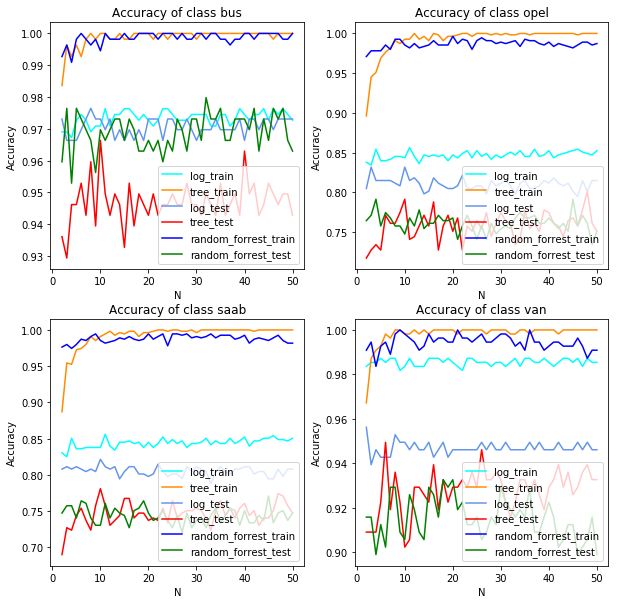

In [45]:
target_ar = [y_train_enc, y_train_enc, 
             y_test_enc, y_test_enc,
            y_train_enc, y_test_enc]

label_ar = ["log_train", "tree_train", "log_test", "tree_test",
           "random_forrest_train", "random_forrest_test"]

data_ar   = [y_score_log_train, y_score_tree_train, 
             y_score_log_test, y_score_tree_test,
             y_score_rf_train, y_score_rf_test]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'green'])

n_col = 2
n_row = 2
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 50
N_ar = np.arange(2, N + 1)

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        accuracy_ar = np.array([accuracy_score(np.int64(data[l]== 2*i+j), np.int64(target==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, accuracy_ar,
                         color=color, label=str(label_ar[k]), )
                         
    axarr[i, j].set_title('Accuracy of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='N', ylabel='Accuracy')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axarr.flat:
 #   ax.label_outer()
plt.show()

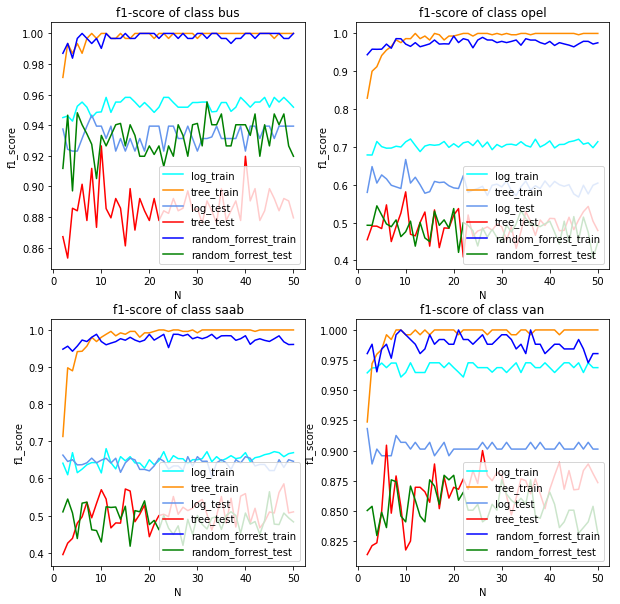

In [46]:
n_col = 2
n_row = 2

f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 50
N_ar = np.arange(2, N + 1)

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        f1_score_ar = np.array([f1_score(np.int64(data[l]== 2*i+j), np.int64(target==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, f1_score_ar, 
                         color=color, label=str(label_ar[k]))
                         
    axarr[i, j].set_title('f1-score of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='N', ylabel='f1_score')
plt.show() 

Вывод:
* Как и в предыдущем пункте оптимальное число деревьем примерно 20

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [47]:
# YOUR CODE HERE

N = 10 #теперь N это доли деления выборки

n_est = 20

n_classes = 4

'''
y_score_cf_tree_train = np.zeros((N, X_train_scaled.shape[0]))
y_score_cf_log_train = np.zeros ((N, X_train_scaled.shape[0]))
y_score_cf_rf_train = np.zeros  ((N, X_train_scaled.shape[0]))

y_score_cf_tree_test = np.zeros ((N, X_test_scaled.shape[0]))
y_score_cf_log_test = np.zeros((N,X_test_scaled.shape[0]))
y_score_cf_rf_test = np.zeros((N,X_test_scaled.shape[0]))
'''
y_score_cf_tree_train = []
y_score_cf_log_train = []
y_score_cf_rf_train = []

y_score_cf_tree_test = []
y_score_cf_log_test = []
y_score_cf_rf_test = []



n = X_train_scaled.shape[0]

for k, i in tqdm(enumerate (np.arange(1, N + 1)), total=N):
    clf_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=16), n_estimators=n_est, n_jobs =-1)
    
    clf_log = BaggingClassifier(OneVsRestClassifier(LogisticRegression(solver='saga', penalty='l1', C=1, max_iter=1000000))
                               , n_estimators=n_est, n_jobs =-1)    
    clf_rf = BaggingClassifier(RandomForestClassifier(n_estimators=n_est), n_jobs=-1)    
    
    clf_rf.fit(X_train_scaled[:int(i/N*n)], y_train_enc[:int(i/N*n)])    
    clf_tree.fit(X_train_scaled[:int(i/N*n)], y_train_enc[:int(i/N*n)])
    clf_log.fit(X_train_scaled[:int(i/N*n)], y_train_enc[:int(i/N*n)])
    
    y_score_cf_rf_test.append(clf_rf.predict(X_test_scaled[:int(i/N*n)]))
    y_score_cf_rf_train.append(clf_rf.predict(X_train_scaled[:int(i/N*n)]))
    
    y_score_cf_tree_test.append (clf_tree.predict(X_test_scaled[:int(i/N*n)]))
    y_score_cf_log_test.append (clf_log.predict(X_test_scaled[:int(i/N*n)]))
    
    y_score_cf_tree_train.append (clf_tree.predict(X_train_scaled[:int(i/N*n)]))
    y_score_cf_log_train.append (clf_log.predict(X_train_scaled[:int(i/N*n)]))



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:05,  1.75it/s]

 20%|██        | 2/10 [00:01<00:06,  1.25it/s]

 30%|███       | 3/10 [00:03<00:07,  1.02s/it]

 40%|████      | 4/10 [00:05<00:07,  1.31s/it]

 50%|█████     | 5/10 [00:08<00:08,  1.77s/it]

 60%|██████    | 6/10 [00:11<00:08,  2.08s/it]

 70%|███████   | 7/10 [00:14<00:07,  2.60s/it]

 80%|████████  | 8/10 [00:19<00:06,  3.17s/it]

 90%|█████████ | 9/10 [00:23<00:03,  3.55s/it]

100%|██████████| 10/10 [00:28<00:00,  3.84s/it]

Как и в предыдущем пункте выведем вместе все графики отдельно для accurcy и для f1-score для каждого из классов

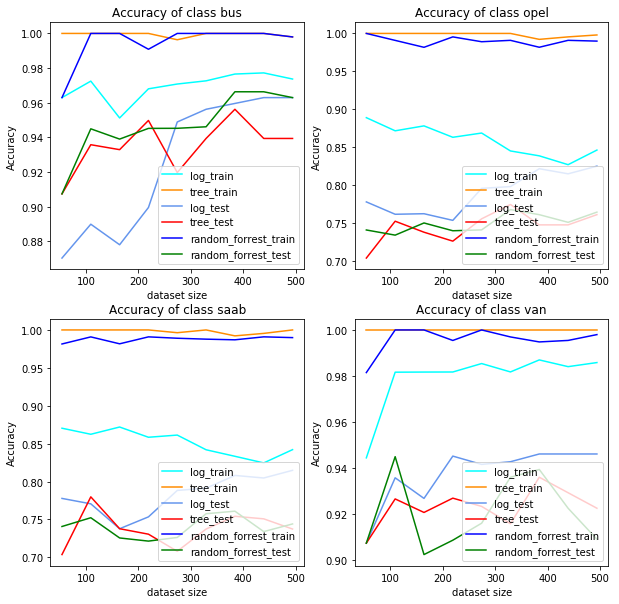

In [48]:
target_ar = [y_train_enc, y_train_enc, 
             y_test_enc, y_test_enc,
            y_train_enc, y_test_enc]

label_ar = ["log_train", "tree_train", "log_test", "tree_test",
           "random_forrest_train", "random_forrest_test"]

data_ar   = [y_score_cf_log_train, y_score_cf_tree_train, 
             y_score_cf_log_test, y_score_cf_tree_test,
             y_score_cf_rf_train, y_score_cf_rf_test]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'green'])

n_col = 2
n_row = 2
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 10
N_ar = np.array(list(map(int, X_train_scaled.shape[0]/N*np.arange(1, N + 1))))[:-1]

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        accuracy_ar = np.array([accuracy_score(np.int64(data[l]== 2*i+j), np.int64(target[:int((l+1)/N*n)]==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, accuracy_ar,
                         color=color, label=str(label_ar[k]) )
        #print (accuracy_ar)
    axarr[i, j].set_title('Accuracy of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='dataset size', ylabel='Accuracy')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axarr.flat:
 #   ax.label_outer()
plt.show()

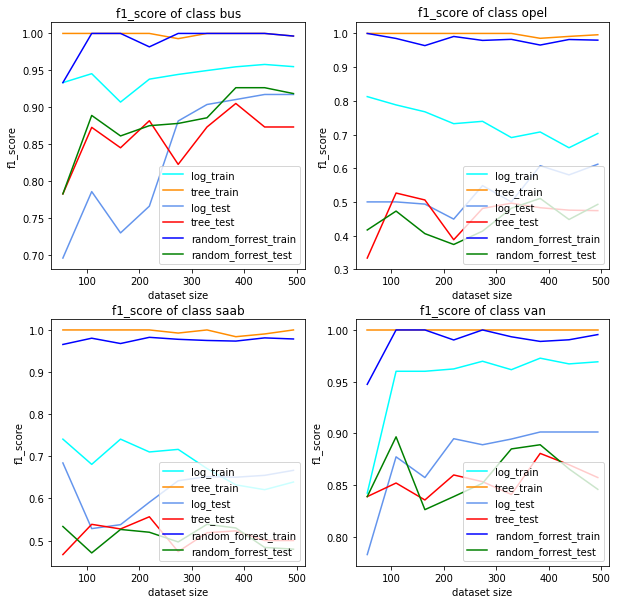

In [49]:
target_ar = [y_train_enc, y_train_enc, 
             y_test_enc, y_test_enc,
            y_train_enc, y_test_enc]

label_ar = ["log_train", "tree_train", "log_test", "tree_test",
           "random_forrest_train", "random_forrest_test"]

data_ar   = [y_score_cf_log_train, y_score_cf_tree_train, 
             y_score_cf_log_test, y_score_cf_tree_test,
             y_score_cf_rf_train, y_score_cf_rf_test]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'green'])

n_col = 2
n_row = 2
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

N = 10
N_ar = np.array(list(map(int, X_train_scaled.shape[0]/N*np.arange(1, N + 1))))[:-1]

classes_matrix = le.classes_.reshape((2,2))

#accuracy_score(np.int64(y_score_log_train[0]==0), np.int64(y_train_enc==i))

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (data, target, label, color) in enumerate(zip(data_ar, target_ar,label_ar, colors)):
        f1_score_ar = np.array([f1_score(np.int64(data[l]== 2*i+j), np.int64(target[:int((l+1)/N*n)]==2*i+j)) for l in range(N-1)])
        axarr[i, j].plot(N_ar, f1_score_ar,
                         color=color, label=str(label_ar[k]) )
        #print (accuracy_ar)
    axarr[i, j].set_title('f1_score of class {0}'.format(classes_matrix[i,j]))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='dataset size', ylabel='f1_score')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axarr.flat:
 #   ax.label_outer()
plt.show()

Вывод:
* В большинстве случаем имеет место увеличение в среднем каждой из метрик при увеличении размера выборки.

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.